In [54]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [55]:
data_train = pd.read_csv('train.csv')
print(data_train)

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

In [56]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [57]:
print(data_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

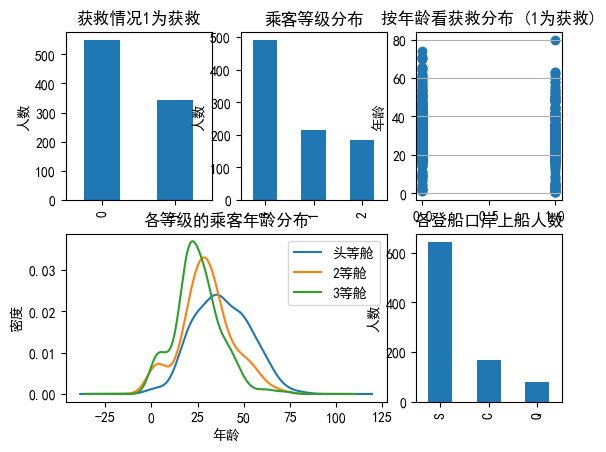

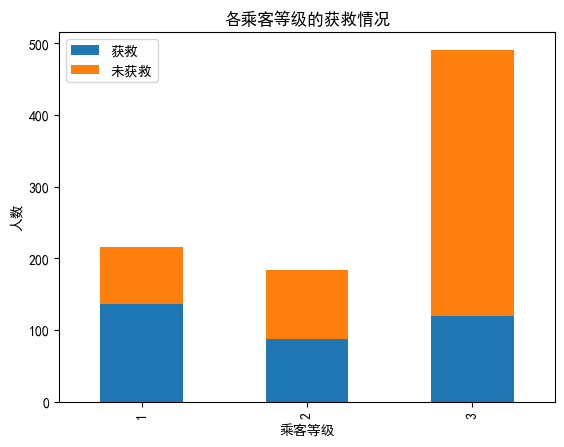

In [59]:
fig = plt.figure()
fig.set(alpha = 0.5)
plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind = 'bar') # 柱状图
plt.title(u"获救情况1为获救")
plt.ylabel(u'人数')

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(visible=True, which='major', axis='y')
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")  # plots an axis label
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")

plt.show()

In [ ]:
Survived_m = data_train.Survived[data_train.Sex =='male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex =='female'].value_counts()

df = pd.DataFrame({u'男性':Survived_m,u'女性':Survived_f})
df.plot(kind='bar',stacked =True)
plt.title(u'按性别看获救情况')
plt.xlabel(u'性别')
plt.ylabel(u'人数')

Text(0, 0.5, '人数')

In [ ]:
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

In [ ]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口")
plt.ylabel(u"人数")

plt.show()

In [ ]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无")
plt.ylabel(u"人数")
plt.show()

In [ ]:
# 使用随机森林拟合缺失数据
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进RandomForgestRegressor
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    y = known_age[:,0]
    x = known_age[:,1:]

    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(x, y)

    # 用得到的模型来进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:,1::])
    df.loc[(df.Age.isnull()),'Age'] = predictedAges

    return df


def set_Cabin_type(df):

    df.loc[(df.Cabin.notnull()),'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()),'Cabin'] = 'No'
    return df

train = set_missing_ages(data_train)
print(train)
train_over = set_Cabin_type(train)
print(train_over)

In [ ]:
dummies_Cabin = pd.get_dummies(train_over['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(train_over['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(train_over['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(train_over['Pclass'], prefix= 'Pclass')

df = pd.concat([train_over, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
print(df)

通过观察数据发现age和fare两个属性的方差太大，所以我们需要对其进行特征化处理，使其落入到[-1,1]之间。

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

print(df)

## 建模
以上我们完成了特征工程的工作，接着我们需要选出自己需要的属性来训练模型

In [ ]:
train_df = df[['Survived', 'Age_scaled', 'Fare_scaled','Cabin_No','Cabin_Yes']]
print(train_df)

In [ ]:
from sklearn import linear_model
# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6,solver='liblinear')
clf.fit(X, y)

print(clf)

In [ ]:
test = pd.read_csv('test.csv')
test.loc[ (test.Fare.isnull()), 'Fare'] = 0
test = set_missing_ages(test)
test_over = set_Cabin_type(test)

dummies_Cabin = pd.get_dummies(test_over['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(test_over['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(test_over['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(test_over['Pclass'], prefix= 'Pclass')
df_test = pd.concat([test_over, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

scaler = preprocessing.StandardScaler()
df_test['Age_scaled'] = scaler.fit_transform(df_test[['Age']])
df_test['Fare_scaled'] = scaler.fit_transform(df_test[['Fare']])

In [ ]:
test_end = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test_end)
result = pd.DataFrame({'PassengerId':test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)
print('预测完成')